Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step
I am 100.00% sure this is a Cat


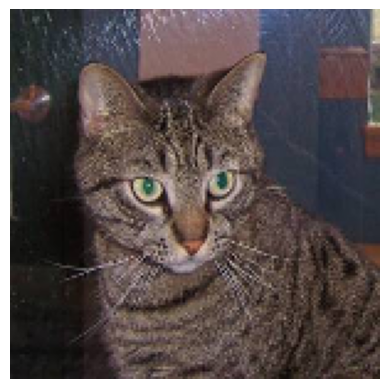

In [42]:
from skimage import io
from matplotlib.image import imread
import cv2
import matplotlib.pyplot as plt
from huggingface_hub import from_pretrained_keras

ROWS, COLS = 150, 150

model = from_pretrained_keras("carlosaguayo/cats_vs_dogs")

img_url = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.1.jpg'

img = imread(img_url)
img = cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
img = img / 255.0
img = img.reshape(1,ROWS,COLS,3)

prediction = model.predict(img)[0][0]
if prediction >= 0.5:
    print('I am {:.2%} sure this is a Cat'.format(prediction))
else:
    print('I am {:.2%} sure this is a Dog'.format(1-prediction))

plt.imshow(img[0], 'Blues')
plt.axis("off")
plt.show()

In [45]:
import os
import numpy as np

val_cats = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/cats'
val_dogs = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/dogs'

val_cats_list = os.listdir(val_cats)
val_dogs_list = os.listdir(val_dogs)

arr_img_cat = np.array([])
arr_img_dog = np.array([])

labels = []
for img in val_cats_list:
  img_url = os.path.join(val_cats, img)
  img = imread(img_url)
  img = cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
  img = img / 255.0
  img = img.reshape(1,ROWS,COLS,3)
  arr_img_cat = np.append(arr_img_cat, img)
  labels.append(0)

for img in val_dogs_list:
  img_url = os.path.join(val_dogs, img)
  img = imread(img_url)
  img = cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
  img = img / 255.0
  img = img.reshape(1,ROWS,COLS,3)
  arr_img_dog = np.append(arr_img_dog, img)
  labels.append(1)

arr_img_cat = arr_img_cat.reshape(-1, ROWS, COLS, 3)
arr_img_dog = arr_img_dog.reshape(-1, ROWS, COLS, 3)
arr_mix = np.concatenate((arr_img_cat, arr_img_dog), axis=0)
labels = np.array(labels)

In [46]:
predictions = model.predict(arr_mix)

32/32 [==============================] - 5s 89ms/step


In [47]:
for i in range(len(predictions)):
  if predictions[i] >= 0.5:
    predictions[i] = 0
  else:
    predictions[i] = 1

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(labels, predictions)

0.897